In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Mostrar todas las columnas sin límite
pd.set_option('display.max_columns', None)

##### **Precios de lácteos**

Iniciamos analizando los precios de los productos lácteos (leche y queso) dado que son un producto de consumo masivo presente en todo el territorio nacional.

In [13]:
colores = {
    'Express': 'orange',
    'Market': 'red',
    'Hipermercado Carrefour': 'blue',
}
productos_df = pd.read_csv('productos_procesado.zip', sep='|')

# Al leer el csv las columnas vuelven a ser sus tipos nativos entonces las reconvertimon a categóricas
productos_df['id_sucursal'] = productos_df['id_sucursal'].astype('category')
productos_df['id_producto'] = productos_df['id_producto'].astype('category')
productos_df['productos_unidad_medida_presentacion'] = productos_df['productos_unidad_medida_presentacion'].astype('category')
productos_df['productos_marca'] = productos_df['productos_marca'].astype('category')
productos_df['productos_unidad_medida_referencia'] = productos_df['productos_unidad_medida_referencia'].astype('category')
productos_df['comercio_bandera_nombre'] = productos_df['comercio_bandera_nombre'].astype('category')
productos_df['id_producto_code'] = productos_df['id_producto'].cat.codes

productos_df = productos_df[productos_df['productos_descripcion'].str.contains('^leche|^queso', case=False, na=False)]
display(productos_df.head())
display(productos_df.info())

,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2,precio_zscore,id_bandera,sucursales_nombre,sucursales_tipo,sucursales_latitud,sucursales_longitud,sucursales_barrio,sucursales_localidad,sucursales_provincia,comercio_bandera_nombre,localidad_provincia,id_producto_code
10,16,7794990177523,True,QUESO EN HEBRAS ITALIANO LA PAULINA FP X 125 GRM,1.0,UNI,LA PAULINA,3255.0,26040.00,125.0,GRM,NaN,NaN,NaN,NaN,-7.351152e-01,1,Monte Grande,Hipermercado,-34.780839,-58.457944,NaN,Monte Grande,Buenos Aires,Hipermercado Carrefour,Monte Grande - Buenos Aires,10271
53,11,7791720028506,True,QUESO CREMA LIGHT CARREFOUR CLASSIC X 290 GRS,1.0,UNI,CARREFOUR CLASSIC,2590.0,8931.03,290.0,GRM,NaN,NaN,NaN,NaN,-1.818989e-12,1,Malvinas Argentinas,Hipermercado,-34.528883,-58.701631,NaN,Malvinas Argentinas,Buenos Aires,Hipermercado Carrefour,Malvinas Argentinas - Buenos Aires,7442
84,10,7794990878871,True,QUESO FUNDIDO FONTINA LA PAULINA POTE X 190 GRS,1.0,UNI,LA PAULINA,2389.0,12573.68,190.0,GRM,NaN,NaN,NaN,NaN,1.858175e-01,1,Villa Tesei,Hipermercado,-34.620610,-58.633769,NaN,Hurlingham,Buenos Aires,Hipermercado Carrefour,Hurlingham - Buenos Aires,10275
88,206,7798181641510,True,LECHE EN POLVO ADVANCED ETAPA 1 SANCOR BEBE X ...,1.0,UNI,SANCOR BEBE,30835.0,38543.75,800.0,GRM,NaN,NaN,NaN,NaN,-5.999348e-01,2,Barrio Norte,Hipermercado,-34.590140,-58.405533,NaN,Ciudad Autónoma de Buenos Aires,CABA,Market,Ciudad Autónoma de Buenos Aires - CABA,12845
94,196,7798181641534,True,LECHE POLVO INF ET3 ADVAN SANCOR BEBE BRIK X80...,1.0,UNI,SANCOR BEBE,26290.0,32862.50,800.0,GRM,NaN,NaN,NaN,NaN,1.267008e+00,3,Corrientes 3651,Supermercado,-34.603633,-58.416192,Almagro,Ciudad Autónoma de Buenos Aires,CABA,Express,Ciudad Autónoma de Buenos Aires - CABA,12847


<class 'pandas.core.frame.DataFrame'>
Index: 37316 entries, 10 to 849210
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   id_sucursal                           37316 non-null  category
 1   id_producto                           37316 non-null  category
 2   productos_ean                         37316 non-null  bool    
 3   productos_descripcion                 37316 non-null  object  
 4   productos_cantidad_presentacion       37316 non-null  float64 
 5   productos_unidad_medida_presentacion  37316 non-null  category
 6   productos_marca                       37316 non-null  category
 7   productos_precio_lista                37316 non-null  float64 
 8   productos_precio_referencia           37316 non-null  float64 
 9   productos_cantidad_referencia         37316 non-null  float64 
 10  productos_unidad_medida_referencia    37316 non-null  category
 11  produ

None

In [14]:
productos_df["id_producto"].nunique()

551

In [15]:
productos_df["id_producto"].value_counts().loc[lambda x: x > 0]

id_producto
7798060853034    126
7790742373304    126
7790742363008    126
7790742363107    126
7798179070728    126
                ... 
7790742448101      1
5701215935266      1
2509027000003      1
2509880000004      1
7798096210023      1
Name: count, Length: 551, dtype: int64

De la última celda podemos analizar que hay productos que estan en todos los tipos de comercio y otros que no.

Para tener un análisis acorde tomamos aquellos productos de bebidas no alcóholicas que están en los tres tipos de comercios.

In [16]:
# Contar el número de sucursales únicas por producto
productos_en_todas_sucursales = productos_df.groupby('id_producto')['comercio_bandera_nombre'].nunique()

# Filtrar los productos que están en todas los comercios, que en nuestro caso son 3, expres, hiper, market
productos_en_todas_sucursales = productos_en_todas_sucursales[productos_en_todas_sucursales == 3].index

# Filtrar el DataFrame original
productos_df_en_varias_sucursales = productos_df[productos_df['id_producto'].isin(productos_en_todas_sucursales)]
print(f"Cantidad de productos que estan en los 3 comercios: {productos_df_en_varias_sucursales['id_producto'].nunique()}")

Cantidad de productos que estan en los 3 comercios: 167


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_76490/3562760019.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todas_sucursales = productos_df.groupby('id_producto')['comercio_bandera_nombre'].nunique()


### **Análisis de Outliers**

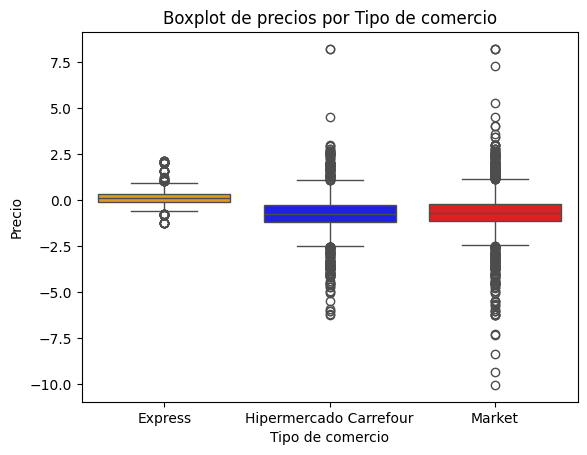

In [17]:
sns.boxplot(x='comercio_bandera_nombre', y='precio_zscore', hue='comercio_bandera_nombre', data=productos_df_en_varias_sucursales, palette=colores, legend=False)

plt.title('Boxplot de precios por Tipo de comercio')
plt.xlabel('Tipo de comercio')
plt.ylabel('Precio')
plt.show()

In [18]:
def remove_outliers_iqr(group):
    Q1 = group['precio_zscore'].quantile(0.25)
    Q3 = group['precio_zscore'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['precio_zscore'] >= lower) & (group['precio_zscore'] <= upper)]

# Aplica la función por categoría
productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', group_keys=False).apply(remove_outliers_iqr)

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_76490/1922502756.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', group_keys=False).apply(remove_outliers_iqr)
/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_76490/1922502756.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', 

Volvemos a filtrar los productos que están en los 3 tipos de comercio ya que al eliminar outliers se pudo producir que algún producto no esté en todos estos tipos.

In [19]:
# Contar el número de sucursales únicas por producto
productos_en_todas_sucursales = productos_df_en_varias_sucursales.groupby('id_producto')['comercio_bandera_nombre'].nunique()

# Filtrar los productos que están en todas los comercios, que en nuestro caso son 3, expres, hiper, market
productos_en_todas_sucursales = productos_en_todas_sucursales[productos_en_todas_sucursales == 3].index

# Filtrar el DataFrame original
productos_df_en_varias_sucursales = productos_df_en_varias_sucursales[productos_df_en_varias_sucursales['id_producto'].isin(productos_en_todas_sucursales)]
print(f"Cantidad de productos que estan en los 3 comercios: {productos_df_en_varias_sucursales['id_producto'].nunique()}")

Cantidad de productos que estan en los 3 comercios: 156


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_76490/1613971439.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todas_sucursales = productos_df_en_varias_sucursales.groupby('id_producto')['comercio_bandera_nombre'].nunique()


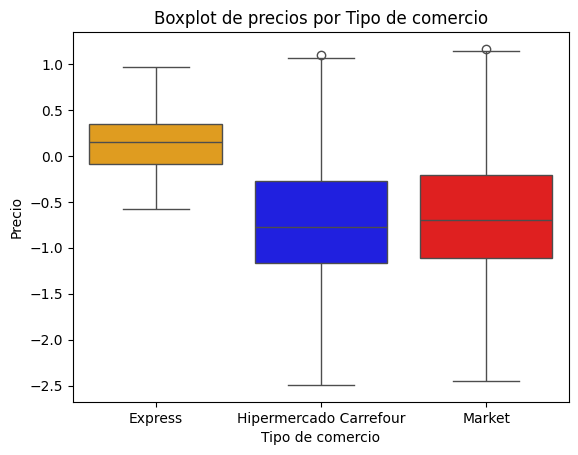

In [20]:
sns.boxplot(x='comercio_bandera_nombre', y='precio_zscore', hue='comercio_bandera_nombre', data=productos_df_en_varias_sucursales, palette=colores, legend=False)

plt.title('Boxplot de precios por Tipo de comercio')
plt.xlabel('Tipo de comercio')
plt.ylabel('Precio')
plt.show()

In [21]:
productos_df_en_varias_sucursales['productos_marca'].value_counts().loc[lambda x: x > 0]

productos_marca
LA SERENISIMA           3522
S/D                     2773
CARREFOUR CLASSIC       2139
FINLANDIA                965
TONADITA                 705
CASANCREM                611
TREGAR                   587
LAS TRES NINAS           536
LA PAULINA               510
SAN IGNACIO              451
SILK                     358
LA SERENISIMA BABY       347
ADLER                    343
CASANTO                  323
MILKAUT                  320
CORAZON DE HORMA SAN     297
CINDOR                   247
NESTLE                   247
SVELTY                   245
NUTRILON                 236
NESQUIK                  226
CARREFOUR CRISTAL        215
LECHELITA                177
LA LECHERA               119
MENDICRIM                114
NIDO                      95
CARREFOUR                 84
Name: count, dtype: int64

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_76490/2429043445.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = productos_df_en_varias_sucursales.groupby('productos_marca')['precio_zscore'].mean().sort_values()


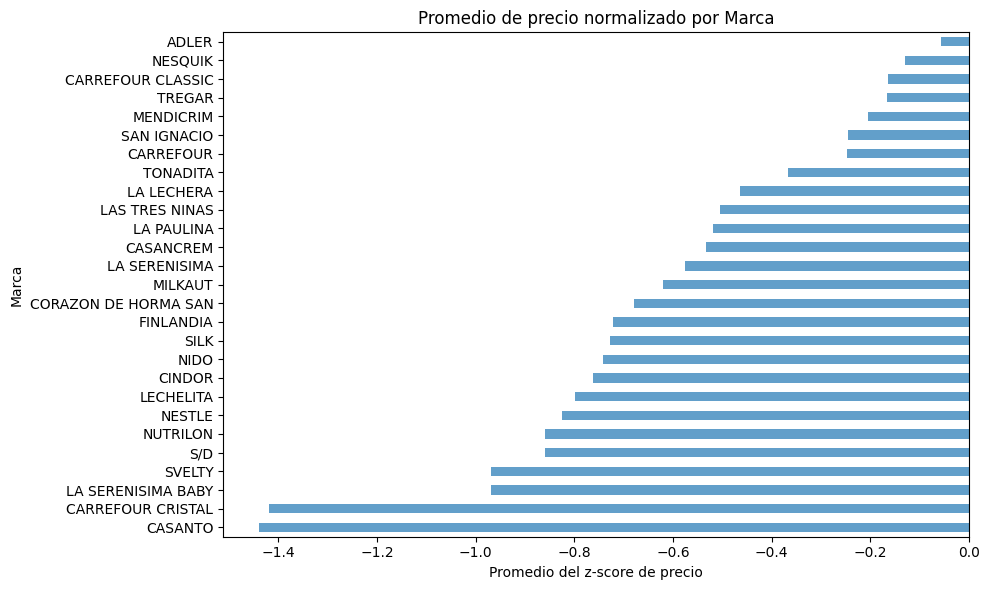

In [22]:
productos_df_en_varias_sucursales['productos_marca'] = productos_df_en_varias_sucursales['productos_marca'].cat.remove_unused_categories()

promedios = productos_df_en_varias_sucursales.groupby('productos_marca')['precio_zscore'].mean().sort_values()
# Hacer el gráfico de barras
promedios.plot(kind='barh', figsize=(10, 6), alpha=0.7)
plt.xlabel('Promedio del z-score de precio')
plt.ylabel('Marca')
plt.title('Promedio de precio normalizado por Marca')
plt.tight_layout()
plt.show()

Analizando este último gráfico se puede notar que las marcas de Carrefour se encuentran más dispersas en términos de precios, por un lado CARREFOUR CLASSIC se encuentra entre las más caras mientras que CARREFOUR CRISTAL se encuentra entre las más baratas.